In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/sebastiaan/miniconda3/envs/tcr/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


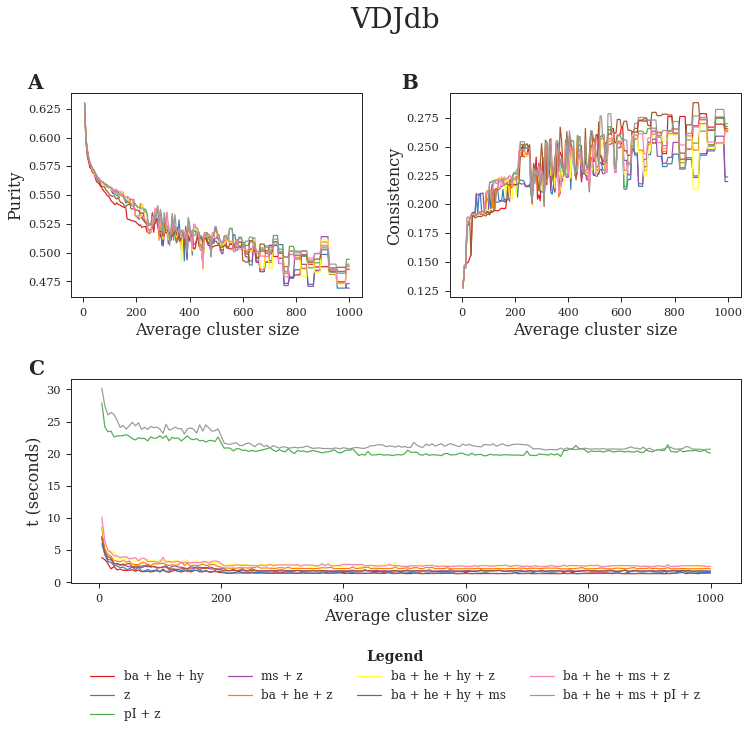

In [111]:
purity = pd.read_csv('../results/faiss_vectorization_purity.tsv', sep='\t').rename(columns={'purity':'evaluation'})
consistency = pd.read_csv('../results/faiss_vectorization_consistency.tsv', sep='\t').rename(columns={'consistency':'evaluation'})

fig = plt.figure(figsize=(12,10))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


fig.suptitle("VDJdb", fontsize=28, y=1.0)
xdata = lambda x: x.avg_cluster_size
ydata = lambda x: x.evaluation

for combo in purity.combo.unique():
    features = purity[purity.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax1.plot(x, y, label=combo)

ax1.set_xlabel("Average cluster size", fontsize=16)
ax1.set_ylabel("Purity", fontsize=16)

for combo in consistency.combo.unique():
    features = consistency[consistency.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax2.plot(x, y, label=combo)

ax2.set_xlabel("Average cluster size", fontsize=16)
ax2.set_ylabel("Consistency", fontsize=16)

ydata = lambda x: x.t

for combo in purity.combo.unique():
    features = purity[purity.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax3.plot(x, y, label=combo)

ax3.set_xlabel("Average cluster size", fontsize=16)
ax3.set_ylabel("t (seconds)", fontsize=16)

fig.subplots_adjust(bottom=0.20, wspace=.3, hspace=.4)
legend_labels = consistency.combo.unique()
legend = fig.legend([ax1, ax2],
                    labels=legend_labels,
                    loc="lower center",
                    borderaxespad=.1,
                    title="Legend",
                    fontsize="12",
                    ncol=4,
                    bbox_to_anchor=(.5, 0)
                   )
plt.setp(legend.get_title(),fontsize='14', fontweight='bold')
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax2.text(-0.11, 1.1, 'B', transform=ax2.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax3.text(-0.04, 1.1, 'C', transform=ax3.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

fig.savefig('../results/figures/sequence_vectorization.eps', format='eps', bbox_inches='tight')

/home/sebastiaan/miniconda3/envs/tcr/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


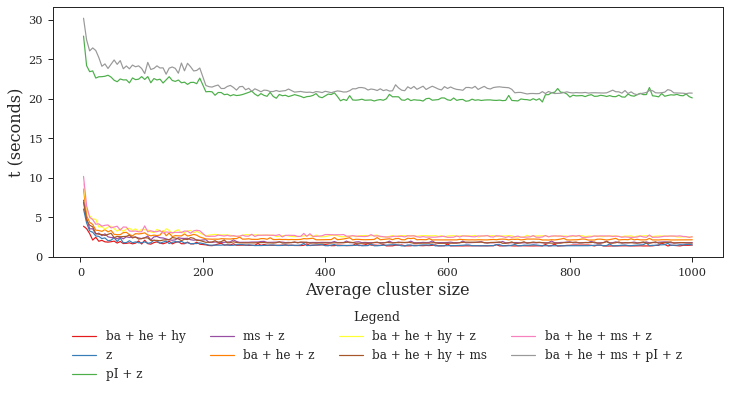

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
xdata = lambda x: x.avg_cluster_size
ydata = lambda x: x.t

for combo in purity.combo.unique():
    features = purity[purity.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax.plot(x, y, label=combo)

ax.set_xlabel("Average cluster size", fontsize=16)
ax.set_ylabel("t (seconds)", fontsize=16)


fig.subplots_adjust(bottom=0.3, wspace=.3)
legend_labels = consistency.combo.unique()
legend = fig.legend([ax1, ax2],
                    labels=legend_labels,
                    loc="lower center",
                    borderaxespad=.1,
                    title="Legend",
                    fontsize="12",
                    ncol=4,
                    bbox_to_anchor=(.5, 0)
                   )
# plt.setp(legend.get_title(),fontsize='14', fontweight='bold')
# ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
# ax2.text(-0.11, 1.1, 'B', transform=ax2.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

fig.savefig('../results/figures/sequence_vectorization_time.eps', format='eps', bbox_inches='tight')